<style>
    /* Style for the h1 tag */
    h1 {
        font-size: 36px;
        font-weight: bold;
        text-align: center;
    }

    /* Style for the h2 tag */
    h2 {
        font-size: 24px;
        font-style: italic;
        text-align: center;
        margin-top: 10px;
        margin-bottom: 20px;
    }

    /* Style for the p tag */
    p {
        font-size: 18px;
        line-height: 1.5;
        text-align: justify;
        margin: 0 auto;
        max-width: 800px;
    }

    /* Style for the blockquote tag */
    blockquote {
        font-size: 16px;
        font-style: italic;
        text-align: center;
        margin-top: 20px;
    }
</style>

<h1>Spin-Orbit Coupling</h1>
<h2>Action by Leonard A. Gómez-García</h2>
<p>In this chapter, we start by further examining the effects of a tidal torque on a satellite’s rotation. For details on the theory please refer directly to the book</p>
<blockquote>Murray, C. D., &amp; Dermott, S. F. (1999). Solar system dynamics. Cambridge university press.</blockquote>


In [11]:
!pip install -q celluloid
!pip install -q plotly

In [12]:
#Packages
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#Constants from packages
from scipy.constants import G
from plotly.subplots import make_subplots
from matplotlib import animation, rc
from scipy.spatial.transform import Rotation as R
from celluloid import Camera
from IPython.display import HTML;

In [2]:
rc('animation', html='html5');

<style>
    
    /* Style for the h2 tag */
    h2 {
        font-size: 24px;
        font-style: italic;
        text-align: center;
        margin-top: 10px;
        margin-bottom: 20px;
    }

        /* Style for the p tag */
    p {
        font-size: 18px;
        line-height: 1.5;
        text-align: justify;
        margin: 0 auto;
        max-width: 800px;
    }
</style>

<h2>5.2 Tidal Despinning</h2>
<p>For small values of the satellite’s eccentricity e, the angle <span>&phi;</span> (Shown in book's Figure 5.1b) is given by:</p>
<div>
  <p>
    $$ \phi \approx 2e \sin{nt}. $$
  </p>
  <img src="./src/gallery/sect_5.2.png" alt="sect_5.2.png" style="width: 35%;">
  <p>The tidal torque acting to change the spin of the satellite is:</p>
  <p>
    $$ N_{s} = -D \left( \frac{a}{r} \right)^{6}sign{(\dot{\eta}-\dot{\phi})} $$
  </p>
  <p>where</p>
  <p>
    $$ D = \frac{3}{2} \frac{k_{2}}{Q_{s}} \frac{n_{4}}{\mathcal{G}} R_{s}^{5} $$
  </p>
  <p>and is a positive constant, and Q<sub>s</sub>, k<sub>2</sub>, and &tau; (y) are the tidal dissipation function, Love number, and radius of the satellite, respectively. A positive torque will act to increase the spin of the satellite, &dot;&eta;.</p>
</div>


| Body | Type | Perturber | $k_2$ | $Q$ | $\tau(\mathrm{y})$ |
| :--- | :--- | :--- | :--- | ---: | :--- |
| Mercury | rocky | Sun | $(0.1)$ | $(100)$ | $4 \times 10^9$ |
| Venus | rocky | Sun | $0.25$ | $(100)$ | $6 \times 10^{10}$ |
| Earth | rocky | Sun | $0.299$ | $ 12 $ | $5 \times 10^{10}$ |
| Mars | rocky | Sun | $0.14$ | $ 86 $ | $7 \times 10^{12}$ |
| Earth | rocky | Moon | $0.299$ | $ 12 $ | $1 \times 10^{10}$ |
| Moon | rocky | Earth | $0.030$ | $ 27 $ | $2 \times 10^7$ |
| Phobos | rocky | Mars | $(0.0000004)$ | $(100)$ | $3 \times 10^5$ |
| Io | rocky | Jupiter | $(0.03)$ | $(100)$ | $2 \times 10^3$ |
| Europa | rocky | Jupiter | $(0.02)$ | $(100)$ | $4 \times 10^4$ |
| Hyperion | icy | Saturn | $(0.0003)$ | $(100)$ | $1 \times 10^9$ |
| Miranda | icy | Uranus | $(0.0009)$ | $(100)$ | $8 \times 10^3$ |
| Ariel | icy | Uranus | $(0.10)$ | $(100)$ | $1 \times 10^4$ |
| Triton | icy | Neptune | $(0.086)$ | $(100)$ | $4 \times 10^4$ |
| Charon | icy | Pluto | $(0.006)$ | $(100)$ | $6 \times 10^5$ |
| Pluto | icy | Charon | $(0.06)$ | $(100)$ | $1 \times 10^7$ |

**To improve:** Instead of defining values, create a table with the parameters above including radius (maybe recall SPICE kernels or using API?) and load it in the code.

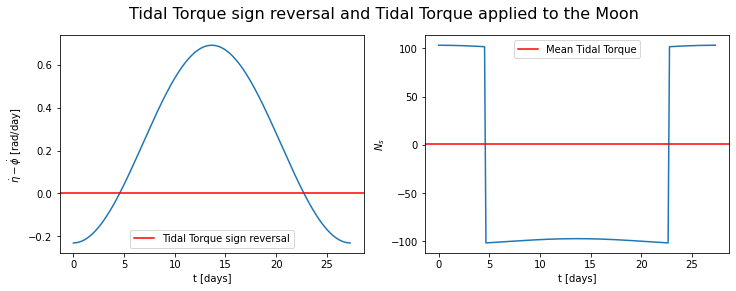

In [12]:
# Time and true anomaly arrays
t = np.linspace(0, 27.3, 200)
f = np.linspace(0, 2*np.pi, 200)

# Values (approximated)
k2 = 0.030
Qs = 27
Rs = 1.7e6/6.3e6
a = 380e6
ecc = 0.005
r = a*(1 - ecc**2)/(1 + ecc*np.cos(f))
n = 2*np.pi/27.3 
eta_dot = n
e = 1
phi_dot = 2*e*n*np.cos(n*t)
sign_reversal = eta_dot - phi_dot

# Computing the Tidal Torque
D = 3/2*k2/Qs*n**4/G*Rs**5
Ns = -D*(a/r)**6*np.sign(sign_reversal)
delta = 0
Mean_Ns = 2*D/np.pi*(4*ecc*np.cos(delta) - delta)

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Tidal Torque sign reversal and Tidal Torque applied to the Moon', fontsize=16)
ax[0].plot(t, sign_reversal)
ax[0].axhline(0.0, color='red', 
               label='Tidal Torque sign reversal')
ax[0].set(xlabel='t [days]', 
           ylabel='$\dot{\eta}-\dot{\phi}$ [rad/day]')
ax[0].legend()

#Plot the Tidal torque function
ax[1].plot(t, Ns)
ax[1].set(xlabel='t [days]', 
           ylabel='$N_s$')
ax[1].axhline(Mean_Ns, color='red', 
               label='Mean Tidal Torque')
ax[1].legend();

<blockquote><b>NOTE:</b> The next code shows an interactive version of the previous plot. If you want to visualize it then you must have to run the notebook due the lack of Plotly previewing that GitHub has.</blockquote>

In [14]:
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Tidal Torque sign reversal', 
                                    'Tidal Torque applied to the Moon'))

# Tidal Torque sign reversal Plot
fig.add_trace(go.Scatter(x=t, y=sign_reversal, name='eta_dot - phi_dot', line=dict(color='blue')), row=1, col=1)
fig.add_shape(type='line', x0=t[0], y0=0, x1=t[-1], 
              y1=0, line=dict(color='red', width=2), row=1, col=1)

# Tidal Torque applied to the Moon Plot
fig.add_trace(go.Scatter(x=t, y=Ns, name='Ns', line=dict(color='blue')), row=1, col=2)
fig.add_shape(type='line', x0=t[0], y0=Mean_Ns, x1=t[-1], 
              y1=Mean_Ns, line=dict(color='red', width=2), row=1, col=2)

# Update subplot layout
fig.update_xaxes(title_text='t [days]', row=1, col=1)
fig.update_yaxes(title_text='$\dot{\eta}-\dot{\phi}$ [rad/day]', row=1, col=1)
fig.update_xaxes(title_text='t [days]', row=1, col=2)
fig.update_yaxes(title_text='$N_s$', row=1, col=2)

fig.update_layout(title='Tidal Torque sign reversal and Tidal Torque applied to the Moon', 
                  title_x=0.5, height=400, width=1000)
fig.show()

<style>
        /* Style for the p tag */
    p {
        font-size: 18px;
        line-height: 1.5;
        text-align: justify;
        margin: 0 auto;
        max-width: 800px;
    }
</style>
<p>As we can see, the Mean Tidal Torque for the Moon is almost 0 (could be more accurate using more accurate parameters), which means that the Moon is at an equilibrium state (because most satellites are at least partially solid and have permanent quadrupole moments, that is, permanent bulges or departures from sphericity.) Let's see an example of it:</p>

In [11]:
a=0.2
e=0.8
b=a*np.sqrt(1-e**2)

Es=np.linspace(0,2*np.pi,100)
rs=(np.vstack((a*np.cos(Es),b*np.sin(Es),np.zeros_like(Es)))).transpose()

am=2
em=0.7
bm=am*np.sqrt(1 - em**2)
    
xm = []
ym = []
for E in np.linspace(0, 2*2*np.pi, 100):
    
    M=R.from_euler('z', E, degrees=False).as_matrix()
    rps=np.array([M.dot(r) for r in rs])
    
    xm.append(am*np.cos(E) + rps[:,0])
    ym.append(am*np.sin(E) + rps[:,1])
    #plt.fill(xm, ym+rps[:,1], color='r')
    #plt.axis("equal")
    #camera.snap()
#
ym = np.array(ym)
xm = np.array(xm)


fig = plt.figure()
camera = Camera(fig)
for i in range(len(xm)):
    plt.scatter(0, 0, c='blue', s=15**2)
    plt.fill(xm[i], ym[i], color='#606875')
    plt.axis('equal')
    camera.snap()
animation = camera.animate()
animation.save('src/gallery/tidal_bulge.gif')
plt.close()
HTML(animation.to_html5_video())

<img src="src/gallery/tidal_bulge.gif" style="align:center; width: 40%">

* Replicar figura 5.1
  - Asignar un valor a n, eta', y hacer la animación
  

In [1]:
!pip install -q pymcel

In [2]:
import pymcel as pc

In [4]:
pc.kepler_newton?

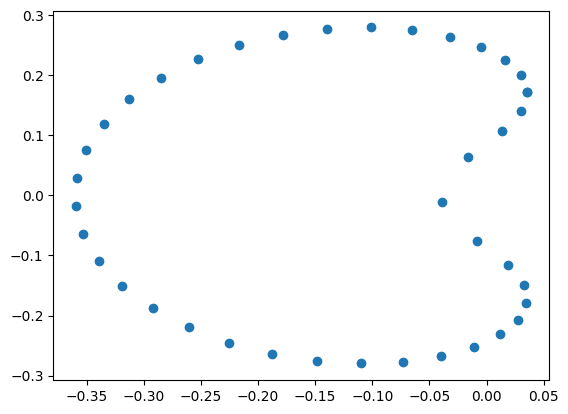

In [42]:
am = 2
em = 0.7
bm = am*np.sqrt(1 - em**2)
Es = np.linspace(0,2*np.pi,100)
rs = (np.vstack((am*np.cos(Es),bm*np.sin(Es),np.zeros_like(Es)))).transpose()

a = 0.2
e = 0.8
b = a*np.sqrt(1 - e**2)
mu = 1
n = (mu/a**3)**1/2

rps = []
tp = 0.01
for t in np.linspace(0, 2*np.pi/n, 40):
    M = n*(t - tp)
    Rot = np.array([[np.cos(M), np.sin(M)],[-np.sin(M), np.cos(M)]])
    E = pc.kepler_newton(M, e)[0]
    f = 2*np.arctan(((1 + e)/(1 - e))**0.5*np.tan(E/2))
    r = a*(1 - e**2)/(1 + e*np.cos(f))
    rs = np.vstack((-r*np.cos(f),-r*np.sin(f))) #Planet coordinates
    rps.append(Rot.dot(rs)) #Primed coordinates

rps = np.array(rps)
xs = rps[:,0]
ys = rps[:,1]

fig = plt.figure()
camera = Camera(fig)
#for i in range(len(rps)):
    #plt.scatter(0, 0, c='blue', s=15**2)
#    plt.plot(xs[i], ys[i], color='#606875')
#    plt.axis('equal')
#    camera.snap()

plt.scatter(xs,ys)